In [2]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np

## Запись полинома Лагранжа по двум узлам

$\Large L2(x) = y_{0} \frac{x-x_{1}}{x_{0}-x_{1}} + y_{1} \frac{x-x_{0}}{x_{1}-x_{0}}$

## Запись полинома Лагранжа по трём узлам
$\Large L3(x) = y_{0} \frac{(x-x_{1})({x-x_{2})}}{(x_{0}-x_{1})({x_{0}-x_{2}})} + y_{1} \frac{(x-x_{0})({x-x_{2})}}{(x_{1}-x_{0})({x_{1}-x_{2}})} + y_{2} \frac{(x-x_{0})({x-x_{1}})}{(x_{2}-x_{0})({x_{2}-x_{1}})}$

В поле редактора запишите выражение для полинома Лагранжа по трём узлам. Самостоятельно найдите решение для следующего набора значений используя скрипт на языке Python:

|$X$|0|0.1|0.2|0.4|0.6|
|:-----:|:-:|:-:|:-:|:-:|:--:|
|$y$|5|5.3|5.5|6.3|6.7|

Найти значение функции $y(x)$ в точке $x$ = 0.175 используя полином Лагранжа построенный по трём узлам.

Для выполнения задания можно добавить новую строку в текущем блокноте или создать новый.

График должен быть оформлен аналогично примерам, на нём должны присутствовать подписи осей, заголовок и легенда. На графике отображаются исходные узлы интерполяции и кривая, проходящая через них, построенная по соответствующему выражению для полинома Лагранжа. Диапазон значений независимой переменной $x$ при построении кривой по полиному выбирается чуть больше, чем крайние значения узлов (т.е. $x < x_{0}$ и $x > x_{n}$, шаг 0.1). Таким образом, кривая будет немного выходить за крайние точки и будет иметь плавный вид.

Выполните расчёт по двум, трём и четырём узлам интерполяции. Отобразите результаты на одном полотне графика и выведите в форматированном виде полученные результаты (см. пример выше).


**Требования к навыкам студента:**

Понимание смысла и взаимосвязи элементов скрипта

Умение перестраивать полиномы по другим наборам узлов интерполяции из имеющихся

Умение находить значение функции в точке интерполяции численно.

**Контрольные вопросы:**

В чём состоит задача интерполяции (постановка задачи интерполяции)?

Основное свойство интерполяционного полинома?

Как доказать, что данная интерполяционная функция проходит через заданные точки?

Запишите полином Лагранжа, проходящий через две, три, четыре, ... десять точек. Сколько слагаемых будет в каждом случае, какое количество скобок в числителе и знаменателе?

Получите у преподавателя индивидуальную задачу. Оформление её решения должно удовлетворять выше изложенным требованиям.

Наборы координат: [(0, 5), (0.1, 5.3), (0.2, 5.5), (0.4, 6.3), (0.6, 6.7)]
L2_P(0.175) = 5.438


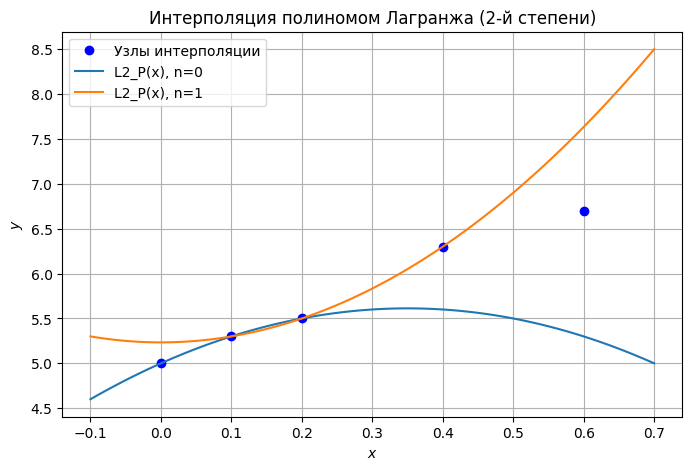

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 0.1, 0.2, 0.4, 0.6]
y = [5, 5.3, 5.5, 6.3, 6.7]
x_val = 0.175  

def join_coord(x, y):
    return [(x[i], y[i]) for i in range(len(x))]

ptc = join_coord(x, y)
print(f'Наборы координат: {ptc}')


def L2_P(x, n, p):
    return p[n][1] * ((x - p[n+1][0]) * (x - p[n+2][0])) / ((p[n][0] - p[n+1][0]) * (p[n][0] - p[n+2][0])) + \
        p[n+1][1] * ((x - p[n][0]) * (x - p[n+2][0])) / ((p[n+1][0] - p[n][0]) * (p[n+1][0] - p[n+2][0])) + \
        p[n+2][1] * ((x - p[n][0]) * (x - p[n+1][0])) / ((p[n+2][0] - p[n][0]) * (p[n+2][0] - p[n+1][0]))
    

y_val = L2_P(x_val, 1, ptc)
print(f'L2_P({x_val}) = {y_val:.3f}')

x_plot = np.linspace(-0.1, 0.7, 100)
y_plot_0 = [L2_P(xi, 0, ptc) for xi in x_plot]
y_plot_1 = [L2_P(xi, 1, ptc) for xi in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(*zip(*ptc), 'ob', label='Узлы интерполяции')
plt.plot(x_plot, y_plot_0, label='L2_P(x), n=0')
plt.plot(x_plot, y_plot_1, label='L2_P(x), n=1')

plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Интерполяция полиномом Лагранжа (2-й степени)')
plt.grid()
plt.show()


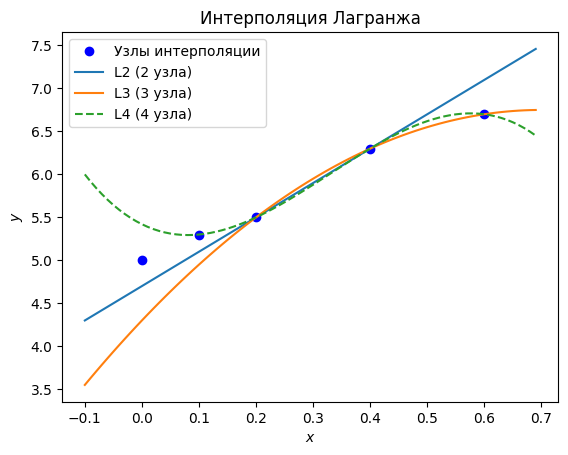

Значение полинома Лагранжа по 2 узлам L2(x) при x = (0.175), y = 5.40
Значение полинома Лагранжа по 3 узлам L2(x) при x = (0.175), y = 5.37
Значение полинома Лагранжа по 4 узлам L2(x) при x = (0.175), y = 5.43


In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 0.1, 0.2, 0.4, 0.6]
y = [5, 5.3, 5.5, 6.3, 6.7]

def L2(x, x0, y0, x1, y1):
    return y0 * (x - x1) / (x0 - x1) + y1 * (x - x0) / (x1 - x0)

def L3(x, x0, y0, x1, y1, x2, y2):
    return (y0 * (x - x1) * (x - x2) / ((x0 - x1) * (x0 - x2))) + \
           (y1 * (x - x0) * (x - x2) / ((x1 - x0) * (x1 - x2))) + \
           (y2 * (x - x0) * (x - x1) / ((x2 - x0) * (x2 - x1)))

def L4(x, x0, y0, x1, y1, x2, y2, x3, y3):
    return (y0 * (x - x1) * (x - x2) * (x - x3) / ((x0 - x1) * (x0 - x2) * (x0 - x3))) + \
           (y1 * (x - x0) * (x - x2) * (x - x3) / ((x1 - x0) * (x1 - x2) * (x1 - x3))) + \
           (y2 * (x - x0) * (x - x1) * (x - x3) / ((x2 - x0) * (x2 - x1) * (x2 - x3))) + \
           (y3 * (x - x0) * (x - x1) * (x - x2) / ((x3 - x0) * (x3 - x1) * (x3 - x2)))


x_L = np.arange(-0.1, 0.7, 0.01)
y_L2 = L2(x_L, x[2], y[2], x[3], y[3])
y_L3 = L3(x_L, x[2], y[2], x[3], y[3], x[4], y[4])
y_L4 = L4(x_L, x[1], y[1], x[2], y[2], x[3], y[3], x[4], y[4])

# Построение графика
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Интерполяция Лагранжа')
plt.plot(x, y, 'ob', label="Узлы интерполяции")
plt.plot(x_L, y_L2, label="L2 (2 узла)")
plt.plot(x_L, y_L3, label="L3 (3 узла)")
plt.plot(x_L, y_L4, '--', label="L4 (4 узла)")
plt.legend()
plt.show()


x_test = 0.175
print(f"Значение полинома Лагранжа по 2 узлам L2(x) при x = ({x_test}), y = {L2(x_test, x[2], y[2], x[3], y[3]):.2f}")
print(f"Значение полинома Лагранжа по 3 узлам L2(x) при x = ({x_test}), y = {L3(x_test, x[2], y[2], x[3], y[3], x[4], y[4]):.2f}")
print(f"Значение полинома Лагранжа по 4 узлам L2(x) при x = ({x_test}), y = {L4(x_test, x[1], y[1], x[2], y[2], x[3], y[3], x[4], y[4]):.2f}")


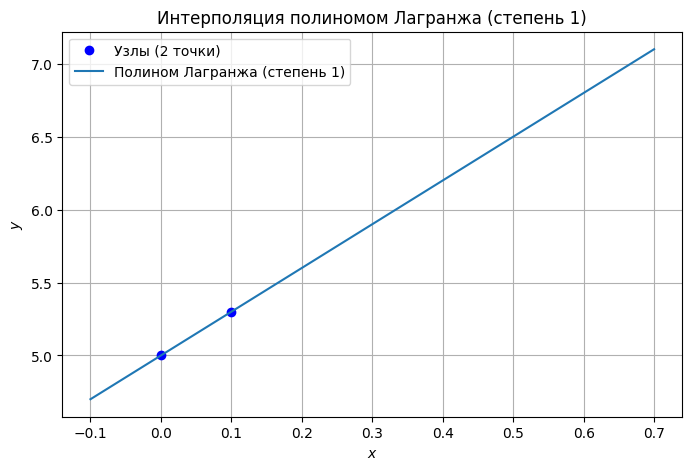

Lagrange(0.175) при 2 узлах = 5.525


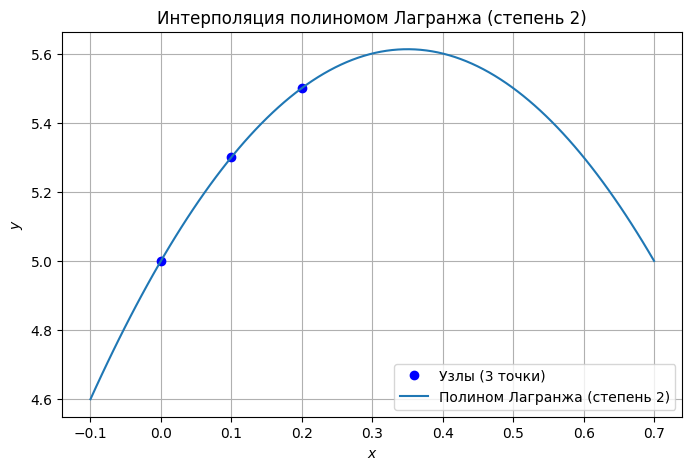

Lagrange(0.175) при 3 узлах = 5.459


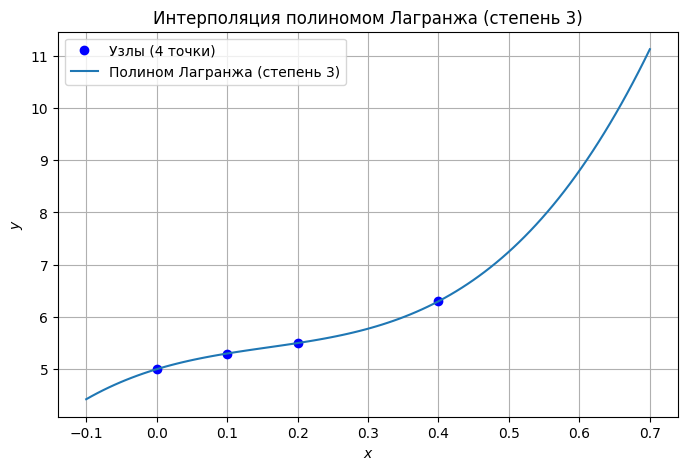

Lagrange(0.175) при 4 узлах = 5.450


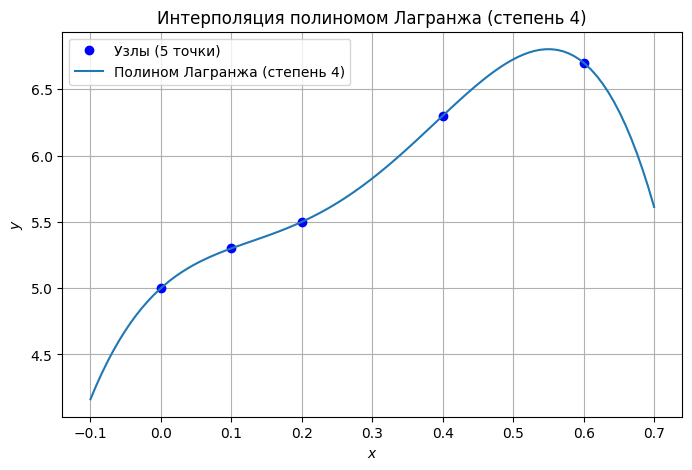

Lagrange(0.175) при 5 узлах = 5.443


In [57]:
import numpy as np
import matplotlib.pyplot as plt


x_vals = [0, 0.1, 0.2, 0.4, 0.6]
y_vals = [5, 5.3, 5.5, 6.3, 6.7]
x_val = 0.175 

# Функция для интерполяции полиномом Лагранжа
def lagrange_interpolation(x_vals, y_vals, x_interp):
    
    def basis_polynomial(x, i, x_vals):
        term = 1
        for j in range(len(x_vals)):
            if i != j:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        return term
            
    def lagrange_poly(x):
        return sum(y_vals[i] * basis_polynomial(x, i, x_vals) for i in range(len(x_vals)))
        
    return lagrange_poly, lagrange_poly(x_interp)


nodes = [2, 3, 4, 5]  
x_plot = np.linspace(-0.1, 0.7, 100)

for k in nodes:
    x_subset = x_vals[:k]  
    y_subset = y_vals[:k]
    
    lagrange_poly, y_val = lagrange_interpolation(x_subset, y_subset, x_val)

   
    y_plot = [lagrange_poly(xi) for xi in x_plot]

    plt.figure(figsize=(8, 5))
    plt.plot(x_subset, y_subset, 'ob', label=f'Узлы ({k} точки)')
    plt.plot(x_plot, y_plot, label=f'Полином Лагранжа (степень {k-1})')

    
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title(f'Интерполяция полиномом Лагранжа (степень {k-1})')
    plt.grid()
    plt.show()
    
    print(f'Lagrange({x_val}) при {k} узлах = {y_val:.3f}')
